In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv('adult.csv', encoding='latin')
print('Shape before deleting duplicate values:', data.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
data.head(5)

Shape before deleting duplicate values: (48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


In [2]:
Target=data.columns[-1]
Feature_names=np.array(data.columns)[:-1]


In [3]:
print(Target)
print(Feature_names)

income
['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


In [4]:
y = data[Target]
X = data.drop(axis=1,labels=Target,inplace=False)

In [5]:
aa=X.nunique()

Continousfeatures=[]
Categoricalfeatures=[]

for i in range(len(Feature_names)):
    if aa[i]>30:
        Continousfeatures.append(Feature_names[i])
    else:
        Categoricalfeatures.append(Feature_names[i])

print(Continousfeatures)
print(Categoricalfeatures)

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
['workclass', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender']


In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,test_size=0.2,random_state=428)



X_train=train.drop(axis=1,labels=Target,inplace=False)
y_train=train[Target]

X_test=test.drop(axis=1,labels=Target,inplace=False)
y_test=test[Target]



In [7]:
for i in Categoricalfeatures:
    X[i].astype("category")
    X_train[i].astype("category")
    X_test[i].astype("category")


# XGBOOST

In [8]:
##pip install xgboost
import xgboost as xgb

In [9]:
clf = xgb.XGBClassifier(
    n_estimators=50,
    enable_categorical=True,  #  si True, tree_method = "gpu_hist" or "hist" or "approx"
    tree_method="approx",        # "gpu_hist" or "hist" or "approx" or "exact"
    #max_depth,booster,random_state,tree_method
)


clf.fit(X, y)



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [10]:
prediction=clf.predict(X_test)

import matplotlib.pyplot as plt

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7442
           1       0.81      0.68      0.74      2327

    accuracy                           0.89      9769
   macro avg       0.86      0.82      0.84      9769
weighted avg       0.88      0.89      0.88      9769

[[7076  366]
 [ 737 1590]]
Accuracy of the model on Testing Sample Data: 0.88


$precison = \frac{TP}{TP+FP}$

$ recall = \frac{TP}{TP+FN}$

$ F1 = \frac{2*precision*recall}{precision+recall}$

In [11]:

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))




Accuracy values for 10-fold Cross Validation:
 [0.86401632 0.86701572 0.87060767 0.86874473 0.87277043 0.86658771
 0.87174381 0.86946249 0.87479577 0.87174574]

Final Average Accuracy of the model: 0.87


<AxesSubplot:>

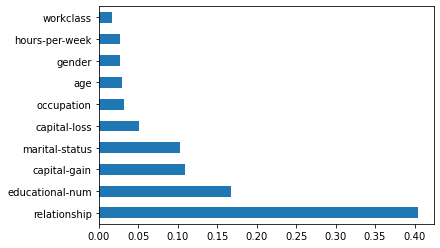

In [12]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(clf.feature_importances_, index=Feature_names)
feature_importances.nlargest(10).plot(kind='barh')



In [13]:
clf.score(X_train,y_train)
#Return the mean accuracy on the given test data and labels.

0.8859314616231158

In [14]:
clf.score(X_test,y_test)

0.8870918210666394

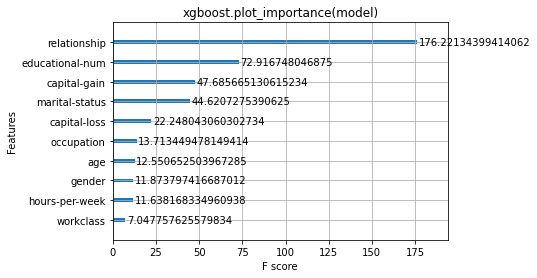

In [15]:

xgb.plot_importance(clf,importance_type='gain',max_num_features=10)
plt.title("xgboost.plot_importance(model)")
plt.show()

In [16]:
clf.feature_importances_

array([0.02877337, 0.01615754, 0.00810598, 0.00659226, 0.16716744,
       0.10229656, 0.03143917, 0.4040014 , 0.01056495, 0.02722162,
       0.10932317, 0.0510054 , 0.02668143, 0.0106696 ], dtype=float32)

In [17]:
clf.predict(X)


array([0, 0, 0, ..., 0, 0, 1])

In [18]:
sum(clf.predict(X))/len(X)

0.19849719503705826

In [19]:
clf.predict_proba(X)

array([[0.99842083, 0.00157919],
       [0.75746095, 0.24253902],
       [0.67697227, 0.32302776],
       ...,
       [0.95281667, 0.04718334],
       [0.9986092 , 0.00139079],
       [0.00162375, 0.99837625]], dtype=float32)

# SHAP

In [20]:
import shap


In [21]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X)
np.shape(shap_values)

### TreeExplainer fonctionne plus vite que Explainer normal
### Warning ..je ne comprends pas

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


(48842, 14)

In [22]:
    #explainer = shap.Explainer(clf, X)
    #shap_values = explainer.shap_values(X)
    #np.shape(shap_values)

## lent
## et le resultat est un peu different

In [23]:
#shap_values

In [24]:
shap_values

array([[-7.56588995e-01, -3.00338008e-02, -7.15182628e-04, ...,
        -3.57434452e-02, -2.12158069e-01, -7.67110940e-03],
       [ 2.08615437e-01,  4.40706983e-02, -1.59149796e-01, ...,
        -6.29586279e-02,  3.94673973e-01,  6.89600303e-04],
       [-6.80235922e-01,  3.49187963e-02,  1.02556154e-01, ...,
        -9.03628320e-02, -3.39347497e-02,  1.31740337e-02],
       ...,
       [ 6.83060944e-01,  3.38918157e-02,  6.00095913e-02, ...,
        -3.24765965e-02, -7.61530548e-02,  1.48379114e-02],
       [-1.97546387e+00, -7.52909295e-03, -8.92539471e-02, ...,
        -5.25475293e-02, -8.31365526e-01, -1.18225608e-02],
       [ 5.61087132e-01,  2.17882410e-01,  1.70776043e-02, ...,
        -3.06443106e-02,  1.03383683e-01,  7.39771081e-03]], dtype=float32)

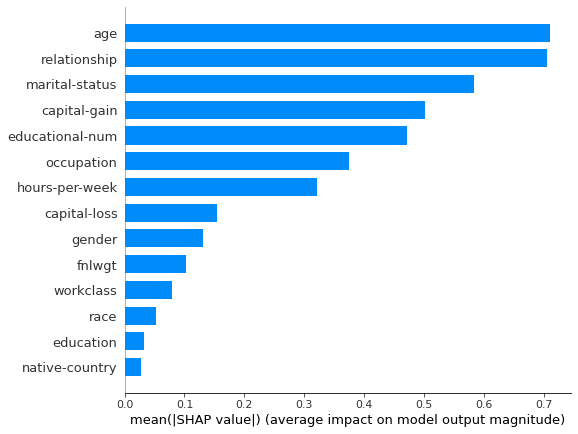

In [25]:
shap.summary_plot(shap_values,X,plot_type="bar")

In [26]:
#shap.summary_plot(shap_values,X,plot_type="bar")

# 1. Clustering dans l'espace d'explicqtion (choisit 5 features, si on choisit 2, le résultat est très mal)




In [27]:
print(np.where(X.columns=='relationship'))
print(np.where(X.columns=='age'))
print(np.where(X.columns=='marital-status'))
print(np.where(X.columns=='capital-gain'))
print(np.where(X.columns=='educational-num'))

(array([7], dtype=int64),)
(array([0], dtype=int64),)
(array([5], dtype=int64),)
(array([10], dtype=int64),)
(array([4], dtype=int64),)


In [28]:
a=pd.DataFrame()
feature1='relationship'
feature2='age'
feature3='marital-status'
feature4='capital-gain'
feature5='educational-num'

feature_for_cluster=[feature1,feature2,feature3,feature4,feature5]

shapfeature1='shap 1'
shapfeature2='shap 2'
shapfeature3='shap 3'
shapfeature4='shap 4'
shapfeature5='shap 5'

shap_feature=[shapfeature1,shapfeature2,shapfeature3,shapfeature4,shapfeature5]


a[shapfeature1]=shap_values[:,7]
a[shapfeature2]=shap_values[:,0]
a[shapfeature3]=shap_values[:,5]
a[shapfeature4]=shap_values[:,10]
a[shapfeature5]=shap_values[:,4]



In [29]:
print(feature_for_cluster)
a

['relationship', 'age', 'marital-status', 'capital-gain', 'educational-num']


,shap 1,shap 2,shap 3,shap 4,shap 5
0,-0.746526,-0.756589,-1.324965,-0.138923,-0.796278
1,0.628899,0.208615,0.343855,-0.153568,-0.322127
2,0.655039,-0.680236,0.332912,-0.182349,0.070991
3,0.727325,0.618562,0.474963,6.433123,0.042944
4,-0.834964,-2.963867,-1.011263,-0.135160,-0.046076
...,...,...,...,...,...
48837,1.287494,-0.673055,0.451879,-0.116749,0.277450
48838,0.669913,0.210145,0.396279,-0.157713,-0.384932
48839,-0.749946,0.683061,-0.402750,-0.124145,-0.340541
48840,-0.652530,-1.975464,-1.004368,-0.140771,-0.244613


In [30]:

from sklearn.cluster import KMeans
import time

kmeans = KMeans(n_clusters=2, random_state=(int)(time.time()))

Cluster=kmeans.fit_predict(a[shap_feature])

#colors = ['#DF2020', '#81DF20']
#a['c'] = a.cluster.map({0:colors[0], 1:colors[1]})

#plt.scatter(a[shapfeature1],a[shapfeature2], c=a.c, alpha = 0.6, s=10)

In [31]:
X_new = pd.DataFrame()
for i in feature_for_cluster:
    X_new[i]=X[i]

X_new
#plt.scatter(X_new[feature1],X_new[feature2], c=a.c, alpha = 0.6, s=10)

,relationship,age,marital-status,capital-gain,educational-num
0,3,25,4,0,7
1,0,38,2,0,9
2,0,28,2,0,12
3,0,44,2,7688,10
4,3,18,4,0,10
...,...,...,...,...,...
48837,5,27,2,0,12
48838,0,40,2,0,9
48839,4,58,6,0,9
48840,3,22,4,0,9


# Skope-rules

In [32]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from skrules import SkopeRules


skp = SkopeRules(
                 max_depth=3,
                 max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.05,
                 feature_names=feature_for_cluster)
 
skp.fit(X_new, Cluster)
rules = skp.rules_
print("Rules")
for rule in rules:
    print(rule[0])
print()
print(20*'=')
print()

Rules
age <= 85.5 and capital-gain > 7073.5
age > 61.5 and capital-gain > 7055.5
relationship <= 0.5 and capital-gain <= 7055.5 and capital-gain > 5095.5
capital-gain <= 5316.5 and capital-gain > 5119.0




In [33]:
#for i in skp.rules_:
#    print("rule:" ,i[0])
#    print("precision:",i[1][0])
#    print("recall:", i[1][1])
#    print()
##(dict of tuples (rule, precision, recall, nb).)

In [34]:
#skp.predict(X_new)==clf.predict(X)

In [35]:
err=0
for i in skp.predict(X_new)==clf.predict(X):
    if i==False:
        err=err+1
print("error rate:",err/len(X))

error rate: 0.1539658490643299


In [36]:
sum(clf.predict(X))/len(X)

0.19849719503705826

In [37]:
sum(Cluster)/len(X)

0.0476638958273617

In [38]:
sum(skp.predict(X_new))/len(X_new)

0.04584169362433971

# 2. Clustering dans l'espace d'explication, par PCA, réduction de dimention. Et visualisation

In [39]:
from sklearn.decomposition import PCA


In [40]:
pca = PCA(n_components=2)

In [41]:
shap_redu=pca.fit_transform(shap_values)

In [42]:
shap_redu

array([[-0.6880721 ,  1.0141326 ],
       [ 0.09416515, -0.9975932 ],
       [-0.0813852 , -0.44484758],
       ...,
       [-0.09475116, -0.44861394],
       [-0.8965589 ,  1.7161828 ],
       [ 6.3243356 ,  1.1683556 ]], dtype=float32)

## cluster

In [43]:
b=pd.DataFrame()
b['shap 0']=shap_redu[:,0]
b['shap 1']=shap_redu[:,1]


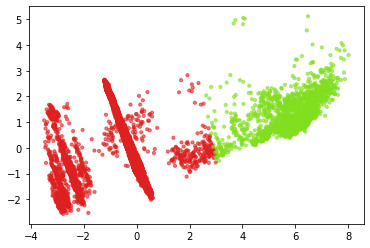

In [44]:
kmeans = KMeans(n_clusters=2, random_state=(int)(time.time()))

b['cluster']=kmeans.fit_predict(b[['shap 0','shap 1']])


colors = ['#DF2020', '#81DF20']
C = b['cluster'].map({0:colors[0], 1:colors[1]})

plt.scatter(shap_redu[:,0],shap_redu[:,1], c=C, alpha = 0.6, s=10)


In [45]:
b['cluster'].all()==Cluster.all()

True

## le résultat est même que 1

## skope-rules

In [46]:

skp_r = SkopeRules(
                 max_depth=3,
                 max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.05,
                 feature_names=Feature_names)


In [47]:
skp_r.fit(X, b['cluster'])


SkopeRules(feature_names=array(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype=object),
           max_depth_duplication=2, n_estimators=30, precision_min=0.3,
           recall_min=0.05)

In [48]:
print("Rules")
for rule in skp_r.rules_:
    print(rule[0])
print()
print(20*'=')
print()

Rules
capital-gain > 7055.5 and educational-num > 4.5
age <= 86.5 and capital-gain > 7055.5
age > 61.5 and capital-gain > 7073.5
capital-gain <= 7055.5 and capital-gain > 5119.0 and relationship <= 0.5
capital-gain <= 5316.5 and capital-gain > 5119.0




In [49]:
#for i in skp_r.rules_:
#    print("rule:" ,i[0])
#    print("precision:",i[1][0])
#    print("recall:", i[1][1])
#    print()

In [50]:
err_r=0
for i in skp_r.predict(X)==clf.predict(X):
    if i==False:
        err_r=err_r+1
print("error rate:",err_r/len(X))

error rate: 0.1539658490643299


# 3. Comparison, si on fait le clustering dans l'espace de variable, choisit encore les 5 features, pour le clustering il faut normalisation. Quand on obient le resultat de cluster, on fait skope sur les donnee bruts

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()


PredictorScalerFit=PredictorScaler.fit(X_new)
_norm=PredictorScalerFit.transform(X_new)
X_norm=pd.DataFrame()
X_norm[feature1]=_norm[:,0]
X_norm[feature2]=_norm[:,1]
X_norm[feature3]=_norm[:,2]
X_norm[feature4]=_norm[:,3]
X_norm[feature5]=_norm[:,4]

X_norm

,relationship,age,marital-status,capital-gain,educational-num
0,0.6,0.109589,0.666667,0.000000,0.400000
1,0.0,0.287671,0.333333,0.000000,0.533333
2,0.0,0.150685,0.333333,0.000000,0.733333
3,0.0,0.369863,0.333333,0.076881,0.600000
4,0.6,0.013699,0.666667,0.000000,0.600000
...,...,...,...,...,...
48837,1.0,0.136986,0.333333,0.000000,0.733333
48838,0.0,0.315068,0.333333,0.000000,0.533333
48839,0.8,0.561644,1.000000,0.000000,0.533333
48840,0.6,0.068493,0.666667,0.000000,0.533333


In [52]:

kmeans = KMeans(n_clusters=2, random_state=(int)(time.time()))

Cluster2=kmeans.fit_predict(X_norm[feature_for_cluster])




In [53]:
if sum(Cluster2)>len(X)/2:
    Cluster2=1-Cluster2

In [54]:

skp2 = SkopeRules(
                 max_depth=3,
                 max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.01,
                 feature_names=feature_for_cluster)
 

In [ ]:
skp2.fit(X_new, Cluster2)


In [ ]:
print("Rules")
for rule in skp2.rules_:
    print(rule[0])
print()
print(20*'=')
print()

In [ ]:
#for i in skp2.rules_:
#    print("rule:" ,i[0])
#    print("precision:",i[1][0])
#    print("recall:", i[1][1])
#    print()
##(dict of tuples (rule, precision, recall, nb).)

In [ ]:
#skp2.predict(X_new)==clf.predict(X)

In [ ]:
err2=0
for i in skp2.predict(X_new)==clf.predict(X):
    if i==False:
        err2=err2+1
print("error rate:", err2/len(X))

# Comparaison, dans l'espace de variable, avec PCA, il faut normalisation

In [ ]:
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)
_norm=PredictorScalerFit.transform(X)
X_norm=pd.DataFrame()
for i in range(len(Feature_names)):
    X_norm[Feature_names[i]]=_norm[:,i]

X_norm

In [ ]:
pca2 = PCA(n_components=2)

In [ ]:
_redu=pca2.fit_transform(X_norm)

In [ ]:
_redu

In [ ]:
X_redu=pd.DataFrame()
X_redu['v 1']=_redu[:,0]
X_redu['v 2']=_redu[:,1]
X_redu

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=(int)(time.time()))

X_redu['cluster']=kmeans.fit_predict(X_redu[['v 1','v 2']])

X_redu
colors = ['#DF2020', '#81DF20']
C2 = X_redu['cluster'].map({0:colors[0], 1:colors[1]})

plt.scatter(_redu[:,0], _redu[:,1], c=C2, alpha = 0.6, s=10)

In [ ]:
if sum(X_redu['cluster'])>len(X)/2:
    X_redu['cluster']=1-X_redu['cluster']

In [ ]:
skp2_r = SkopeRules(
                 max_depth=3,
                 max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.05,
                 feature_names=Feature_names)

In [ ]:
skp2_r.fit(X, X_redu['cluster'])

In [ ]:
print("Rules")
for rule in skp2_r.rules_:
    print(rule[0])
print()
print(20*'=')
print()

In [ ]:
#for i in skp2_r.rules_:
#    print("rule:" ,i[0])
#    print("precision:",i[1][0])
#    print("recall:", i[1][1])
#    print()
##(dict of tuples (rule, precision, recall, nb).)

In [ ]:
err2_r=0
for i in skp2_r.predict(X)==clf.predict(X):
    if i==False:
        err2_r=err2_r+1
print("error rate:",err2_r/len(X))

# Conclusion
## Le cluster dual est meilleur que le cluster dans l'espace de variable